# DIC_LAB_4_QNS_1 : Making a Word Cloud

In [1]:
library("twitteR")
library("DBI")
library("RSQLite")
library("wordcloud")
library("SnowballC")
library("tm")
library("dplyr")
Sys.setlocale(category = "LC_ALL", locale = "C")

Loading required package: RColorBrewer
Loading required package: NLP

Attaching package: ‘dplyr’

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

function to remove the urls

In [252]:
removeURL = function(x) {
    str = gsub("[<].*[>]", "", gsub("http[^[:space:]]*", "", x))
    return (str)
}

Authorize twitter API keys

In [6]:
setup_twitter_oauth('rAqZwIdUYoji0Vvp9p3R31Gqm',"V6MiPvEYC8VCEm4JcUEWB4YMGtUAS6OGvF0UXJp0VGYdDlYFt2","771507053600833536-gk5qwQ3jAkdaZC5jPCxSqc01tkNCzlR","vRN5Nhfp5WoinneUepef007yqlQuXxSD4gPXEUJwUXcmt")

[1] "Using direct authentication"


Set the number of tweets to collect

In [29]:
LIMIT = 1000

Set the search String 

In [30]:
searchTopicString = "#MachineLearning"

Search the twitter for above mentioned string

In [31]:
topicTweets = searchTwitter(searchTopicString,LIMIT)

In [32]:
topicTweets = strip_retweets(topicTweets)

Show some data

In [33]:
head(topicTweets)

[[1]]
[1] "missdkingsbury: Check out @Google #Cloud Platform #BigData and #MachineLearning Fundamentals #course for only $60! https://t.co/Q6tmNsbsEw via @coursera"

[[2]]
[1] "joshinav: #AI app knows when couples are fighting, may someday predict (and prevent) conflict <U+201D> https://t.co/oquzRv2fTi #MachineLearning"

[[3]]
[1] "xtools_at: The mind in the machine: Demis Hassabis on artificial intelligence #machinelearning #bigdata #ai https://t.co/KbXDUwc61L"

[[4]]
[1] "sparkl3rz: Is #machinelearning the End of #Marketing As We Know It?\n#AI #bigdata #ML #digital... https://t.co/HIWNi7UTGJ by<U+2026> https://t.co/kMq8SqGaSn"

[[5]]
[1] "Chemo101: The latest The https://t.co/y6uFR8X6an Daily! https://t.co/eZcQP4aQUL Thanks to @bon__fifi #bigdata #machinelearning"

[[6]]
[1] "Dr_Who: il #MachineLearning per confermare i trend di fondo #digitalklive #BigData"


Convert the tweets to Dataframe

In [34]:
topicTweetsDf = twListToDF(topicTweets)

Show the converted tweets as a dataframe

In [35]:
head(topicTweetsDf)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
Check out @Google #Cloud Platform #BigData and #MachineLearning Fundamentals #course for only $60! https://t.co/Q6tmNsbsEw via @coursera,FALSE,0,NA,2017-04-22 13:34:56,FALSE,NA,855776939822338048,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",missdkingsbury,0,FALSE,FALSE,NA,NA
"#AI app knows when couples are fighting, may someday predict (and prevent) conflict <U+201D> https://t.co/oquzRv2fTi #MachineLearning",FALSE,0,NA,2017-04-22 13:34:00,FALSE,NA,855776705365118981,NA,"<a href=""http://bufferapp.com"" rel=""nofollow"">Buffer</a>",joshinav,0,FALSE,FALSE,NA,NA
The mind in the machine: Demis Hassabis on artificial intelligence #machinelearning #bigdata #ai https://t.co/KbXDUwc61L,FALSE,0,NA,2017-04-22 13:33:20,FALSE,NA,855776536485670912,NA,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",xtools_at,0,FALSE,FALSE,NA,NA
Is #machinelearning the End of #Marketing As We Know It? #AI #bigdata #ML #digital... https://t.co/HIWNi7UTGJ by<U+2026> https://t.co/kMq8SqGaSn,FALSE,1,NA,2017-04-22 13:32:41,TRUE,NA,855776373360742403,NA,"<a href=""http://linkis.com"" rel=""nofollow"">Linkis: turn sharing into growth</a>",sparkl3rz,0,FALSE,FALSE,NA,NA
The latest The https://t.co/y6uFR8X6an Daily! https://t.co/eZcQP4aQUL Thanks to @bon__fifi #bigdata #machinelearning,FALSE,1,NA,2017-04-22 13:32:22,FALSE,NA,855776291378929664,NA,"<a href=""http://paper.li"" rel=""nofollow"">Paper.li</a>",Chemo101,0,FALSE,FALSE,NA,NA
il #MachineLearning per confermare i trend di fondo #digitalklive #BigData,FALSE,1,NA,2017-04-22 13:32:09,FALSE,NA,855776238698418177,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Dr_Who,1,FALSE,FALSE,NA,NA


Save the tweets

In [36]:
saveRDS(topicTweetsDf,file = "topicTweetsDf.Rda")

Load the tweets

In [253]:
topicTweetsDf = readRDS(file = "topicTweetsDf.Rda")

Select only the text field of the tweets

In [254]:
topicTweetsTextDf = data.frame(topicTweetsDf$text, stringsAsFactors=FALSE)

Rename the column name

In [255]:
colnames(topicTweetsTextDf) <- c("text")

Show the data 

In [256]:
head(topicTweetsTextDf)

text
Check out @Google #Cloud Platform #BigData and #MachineLearning Fundamentals #course for only $60! https://t.co/Q6tmNsbsEw via @coursera
"#AI app knows when couples are fighting, may someday predict (and prevent) conflict <U+201D> https://t.co/oquzRv2fTi #MachineLearning"
The mind in the machine: Demis Hassabis on artificial intelligence #machinelearning #bigdata #ai https://t.co/KbXDUwc61L
Is #machinelearning the End of #Marketing As We Know It? #AI #bigdata #ML #digital... https://t.co/HIWNi7UTGJ by<U+2026> https://t.co/kMq8SqGaSn
The latest The https://t.co/y6uFR8X6an Daily! https://t.co/eZcQP4aQUL Thanks to @bon__fifi #bigdata #machinelearning
il #MachineLearning per confermare i trend di fondo #digitalklive #BigData


In [257]:
removeURL(topicTweetsTextDf$text[4])

[1] "Is #machinelearning the End of #Marketing As We Know It?\n#AI #bigdata #ML #digital...  by<U+2026> "

Remove all the urls

In [258]:
len = nrow(topicTweetsTextDf)
for(i in 1:len) {
  topicTweetsTextDf$text[i] = removeURL(topicTweetsTextDf$text[i])
}
head(topicTweetsTextDf)

text
Check out @Google #Cloud Platform #BigData and #MachineLearning Fundamentals #course for only $60! via @coursera
"#AI app knows when couples are fighting, may someday predict (and prevent) conflict <U+201D> #MachineLearning"
The mind in the machine: Demis Hassabis on artificial intelligence #machinelearning #bigdata #ai
Is #machinelearning the End of #Marketing As We Know It? #AI #bigdata #ML #digital... by<U+2026>
The latest The Daily! Thanks to @bon__fifi #bigdata #machinelearning
il #MachineLearning per confermare i trend di fondo #digitalklive #BigData


Show the data cleaned in above step

In [259]:
head(topicTweetsTextDf)

text
Check out @Google #Cloud Platform #BigData and #MachineLearning Fundamentals #course for only $60! via @coursera
"#AI app knows when couples are fighting, may someday predict (and prevent) conflict <U+201D> #MachineLearning"
The mind in the machine: Demis Hassabis on artificial intelligence #machinelearning #bigdata #ai
Is #machinelearning the End of #Marketing As We Know It? #AI #bigdata #ML #digital... by<U+2026>
The latest The Daily! Thanks to @bon__fifi #bigdata #machinelearning
il #MachineLearning per confermare i trend di fondo #digitalklive #BigData


Write the data in a file for Hadoop Map Reduce

In [260]:
write.table(topicTweetsTextDf, "/home/vipin/hadoopLocal/tweetText.txt", row.names = FALSE)

Read the file which is generated by hadoop word count program

In [264]:
mydata = read.csv("/home/vipin/hadoopLocal/hashtags.txt",sep="",header = FALSE)

Convert the data into a matrix

In [265]:
tdm = as.matrix(mydata)

Make the word cloud from this matrix

Warning message in wordcloud(tdm, max.words = 250, min.freq = 1, random.order = FALSE, :
"kirkdborneu2026 could not be fit on page. It will not be plotted."Warning message in wordcloud(tdm, max.words = 250, min.freq = 1, random.order = FALSE, :
"nerderymisfit could not be fit on page. It will not be plotted."Warning message in wordcloud(tdm, max.words = 250, min.freq = 1, random.order = FALSE, :
"pymntsu2026 could not be fit on page. It will not be plotted."Warning message in wordcloud(tdm, max.words = 250, min.freq = 1, random.order = FALSE, :
"sagittarscopes could not be fit on page. It will not be plotted."

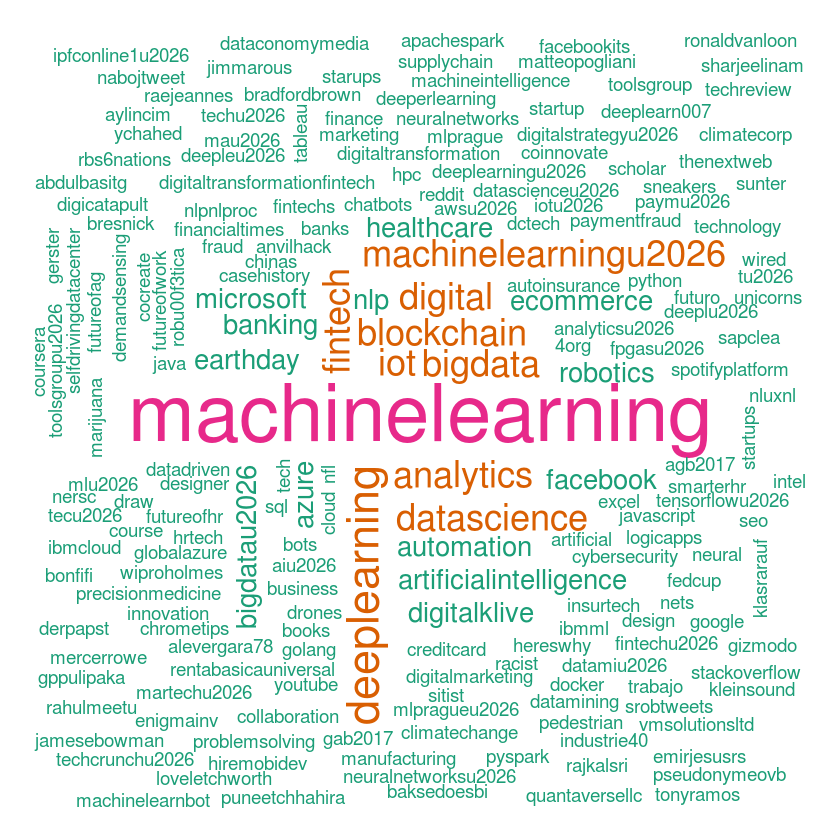

In [266]:
wordcloud(tdm, max.words = 250, min.freq =1, random.order = FALSE,colors = brewer.pal(4, "Dark2"))

# References 

1. http://rstudio-pubs-static.s3.amazonaws.com/149291_bafd9f23bdee4a75a5726ad93394ec64.html
2. http://www.rdatamining.com/books/rdm/faq/removeurlsfromtext